<i> This notebook represents the lab-task associated with data pre-processing. </i> <br> <br>

    


## Importing the libraries

In [108]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

## Importing the dataset

The below command is used to import CSV dataset

In [109]:
data = pd.read_csv('employees_attrition.csv')
data

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,0,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,0,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,0,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


# Let's check the number of rows and columns in our dataset where rows and columns are stores as a tuple (number of rows, number of columns). In our imported dataset there are 1470 rows and 35 columns.

In [111]:
df_dev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   int64 
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

## To know whether any cell value is empty or not

The imported dataset contains null values.

In [112]:
data.isnull().values.any()

False

Now, our next tast is to separate features and label from our dataset. Our dataset contain 4 columns and 10 rows where columns 'Age' and 'Salary' is considered to be features and last column i.e. Purchased is considered as label. I have not included country column as features because to many features can confuse certain machine learning algorithm. Too much dimension acts as noise to our machine learning model. 
<br>

We need dimension reduction beacuse:

    1. The increase in the number of data dimensions make it more difficult for Machine Learning models to take all the representation into account which sometimes negatively impacted the accuracy of the outcome. This is called "Curse of Dimensionality" in the data world.
    2. More dimensions can be act as noise than a feature and some of the features might not be related to our outcome. Thus, unwanted features is just creating random weight for decision to made.
    3. Lower dimension means lower parameter to learn and practice. If our dataset have huge number of dimension occasionally cause noise, and model does not know anything. Therefore, the result of lower dimension give faster result and efficient model.
    4. In general, when the column decreases, then in most cases the number of rows needed to learn is also reduced.

In [176]:
# features = data.iloc[ : ,0:35]
features = data.iloc[ : ,data.columns != 'Attrition']
features

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,...,1,80,0,8,0,1,6,4,0,5
1,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,...,4,80,1,10,3,3,10,7,1,7
2,37,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,...,2,80,0,7,3,3,0,0,0,0
3,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,...,3,80,0,8,3,3,8,7,3,0
4,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,3,...,3,80,1,17,3,3,5,2,0,3
1466,39,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,4,...,1,80,1,9,5,3,7,7,1,7
1467,27,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,2,...,2,80,1,6,0,3,6,2,0,3
1468,49,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,4,...,4,80,0,17,3,2,9,6,0,8


In [115]:
labels = data.iloc[:, data.columns == 'Attrition'] #outcome predicted target or dependent variable
labels

,Attrition
0,1
1,0
2,1
3,0
4,0
...,...
1465,0
1466,0
1467,0
1468,0


# Get the Categorical features 

In [179]:
cat_features = features[['Age','DailyRate','DistanceFromHome','Education','EmployeeCount','EnvironmentSatisfaction','StandardHours','StockOptionLevel', 'TotalWorkingYears','TrainingTimesLastYear','WorkLifeBalance','YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']]
cat_features

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,1,2,1,2,80,0,8,0,1,6,4,0,5
1,49,279,8,1,1,3,80,1,10,3,3,10,7,1,7
2,37,1373,2,2,1,4,80,0,7,3,3,0,0,0,0
3,33,1392,3,4,1,4,80,0,8,3,3,8,7,3,0
4,27,591,2,1,1,1,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,884,23,2,1,3,80,1,17,3,3,5,2,0,3
1466,39,613,6,1,1,4,80,1,9,5,3,7,7,1,7
1467,27,155,4,3,1,2,80,1,6,0,3,6,2,0,3
1468,49,1023,2,3,1,4,80,0,17,3,2,9,6,0,8


array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'DailyRate'}>,
        <AxesSubplot:title={'center':'DistanceFromHome'}>,
        <AxesSubplot:title={'center':'Education'}>],
       [<AxesSubplot:title={'center':'EmployeeCount'}>,
        <AxesSubplot:title={'center':'EnvironmentSatisfaction'}>,
        <AxesSubplot:title={'center':'StandardHours'}>,
        <AxesSubplot:title={'center':'StockOptionLevel'}>],
       [<AxesSubplot:title={'center':'TotalWorkingYears'}>,
        <AxesSubplot:title={'center':'TrainingTimesLastYear'}>,
        <AxesSubplot:title={'center':'WorkLifeBalance'}>,
        <AxesSubplot:title={'center':'YearsAtCompany'}>],
       [<AxesSubplot:title={'center':'YearsInCurrentRole'}>,
        <AxesSubplot:title={'center':'YearsSinceLastPromotion'}>,
        <AxesSubplot:title={'center':'YearsWithCurrManager'}>,
        <AxesSubplot:>]], dtype=object)

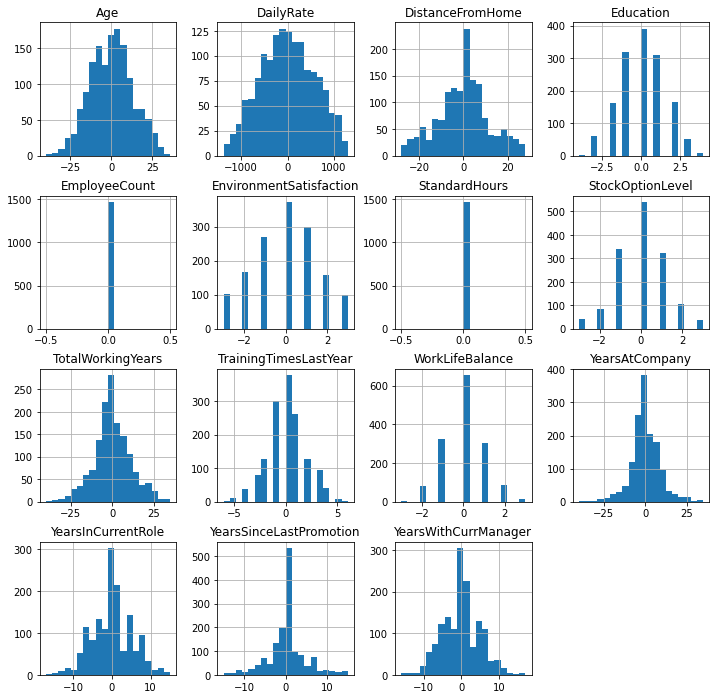

In [188]:
cat_features[cat_features.columns].diff().hist(bins=20, figsize=(12,12))

# Based on the above Histogram its evident that the EmployeeCount and StandardHours are constants so we can drop these two columns

In [198]:
cat_features_true = cat_features.drop(['EmployeeCount','StandardHours'], axis=1)

In [199]:
cat_features_true

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,1,2,2,0,8,0,1,6,4,0,5
1,49,279,8,1,3,1,10,3,3,10,7,1,7
2,37,1373,2,2,4,0,7,3,3,0,0,0,0
3,33,1392,3,4,4,0,8,3,3,8,7,3,0
4,27,591,2,1,1,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,884,23,2,3,1,17,3,3,5,2,0,3
1466,39,613,6,1,4,1,9,5,3,7,7,1,7
1467,27,155,4,3,2,1,6,0,3,6,2,0,3
1468,49,1023,2,3,4,0,17,3,2,9,6,0,8


In [201]:
cat_features_true.columns.values.tolist()

['Age',
 'DailyRate',
 'DistanceFromHome',
 'Education',
 'EnvironmentSatisfaction',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

 # Bifurcate the categorical (Text) and numerical attributes

In [120]:
df_numerical_features = features.select_dtypes(include='number')
df_categorical_features = features.select_dtypes(include='object')

In [203]:
df_categorical_features.columns.values.tolist()

['BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'Over18',
 'OverTime']

## OneHotEncoder to convert the textual Data into the numeric categories

In [204]:
## sklearn OrdinalEncoder
## from sklearn.preprocessing import OrdinalEncoder
## ordinal_encoder = OrdinalEncoder()
## emp_cat_encoded = ordinal_encoder.fit_transform(df_categorical_features)

In [205]:
## emp_cat_encoded

In [206]:
## ordinal_encoder.categories_

In [207]:
from sklearn.preprocessing import OneHotEncoder

In [208]:
onehot_encoder = OneHotEncoder()

In [209]:
drop_enc = onehot_encoder.fit_transform(df_categorical_features)

In [210]:
encoded_cat_feature = onehot_encoder.get_feature_names_out(['BusinessTravel','Department','EducationField','Gender','JobRole','MaritalStatus','Over18','OverTime'])

In [217]:
encoded_cat_df = pd.DataFrame(drop_enc.toarray(),columns = encoded_cat_feature).astype('int64')
encoded_cat_df

,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,...,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Over18_Y,OverTime_No,OverTime_Yes
0,0,0,1,0,0,1,0,1,0,0,...,0,0,1,0,0,0,1,1,0,1
1,0,1,0,0,1,0,0,1,0,0,...,0,1,0,0,0,1,0,1,1,0
2,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,1
3,0,1,0,0,1,0,0,1,0,0,...,0,1,0,0,0,1,0,1,0,1
4,0,0,1,0,1,0,0,0,0,1,...,0,0,0,0,0,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0,1,0,0,1,0,0,0,0,1,...,0,0,0,0,0,1,0,1,1,0
1466,0,0,1,0,1,0,0,0,0,1,...,0,0,0,0,0,1,0,1,1,0
1467,0,0,1,0,1,0,0,1,0,0,...,0,0,0,0,0,1,0,1,0,1
1468,0,1,0,0,0,1,0,0,0,1,...,0,0,1,0,0,1,0,1,1,0


One-hot encoding for Categorical Variables

In [10]:
dataset.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129,0.161224
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136,0.367863
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000,0.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000,0.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000,0.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000,1.000000


sklearn provides LabelEncoder Library which is used to normalize labels also can be used to transform non-numerical labels to numerical labels and make it machine-readable form. Machine Learning algorithms can then decide in a better way on how those labels must be operated.
<br> 
After using LabelEncoder for Purchased Column then target label for Yes = 1 and No = 0 

In [ ]:
Purchased = dataset[dataset['Purchased'] == 1]

In [11]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder() 
dataset['Purchased'] = lb.fit_transform(dataset['Purchased'])
dataset

,Age,Salary,Purchased
0,44.000000,72000.000000,0
1,27.000000,48000.000000,1
2,30.000000,54000.000000,0
3,38.000000,61000.000000,0
4,40.000000,63777.777778,1
5,35.000000,58000.000000,1
6,38.777778,52000.000000,0
7,48.000000,79000.000000,1
8,50.000000,83000.000000,0
9,37.000000,67000.000000,1


In [12]:
Purchased = dataset[dataset['Purchased'] == 1]
Not_Purchased = dataset[dataset['Purchased'] == 0]
print('Purchased a car           :' , Purchased.shape)
print('Not Purchased a car       :' , Not_Purchased.shape)

Purchased a car           : (5, 3)
Not Purchased a car       : (5, 3)


Pandas's value_counts() method is the built in pandas function that returns an object containing counts of unique value in sorted order.

In [13]:
dataset.Purchased.value_counts()

1    5
0    5
Name: Purchased, dtype: int64

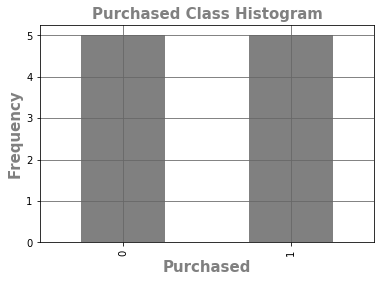

In [14]:
classes_count = pd.value_counts(dataset['Purchased'],sort = True).sort_index()
classes_count.plot(kind='bar', color = "Gray")
plt.title('Purchased Class Histogram', fontweight='bold', fontsize = '15', color = "gray")
plt.xlabel('Purchased', fontweight='bold', fontsize = '15', color = "gray")
plt.ylabel('Frequency', fontweight='bold', fontsize = '15', color = "gray")
plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.show()

StandardScaler performs the task of Standardization. Usually a dataset contains variables thar are different scale. 
For Example:
An Employee dataset will contain AGE column with values on Scale 20-70 and Salary column with Values on scale 10000 - 100000.
As these two columns are different in scale, they are Standardized to have common scale while building machine learning model

In [15]:
from sklearn.preprocessing import StandardScaler

scaler =StandardScaler()
dataset['normalized_age'] = scaler.fit_transform(dataset['Age'].values.reshape(-1,1))
dataset['normalized_salary'] = scaler.fit_transform(dataset['Salary'].values.reshape(-1,1))


In [16]:
dataset = dataset.drop(['Age', 'Salary'], axis = 1)
dataset

,Purchased,normalized_age,normalized_salary
0,0,0.758874,7.494733e-01
1,1,-1.711504,-1.438178e+00
2,0,-1.275555,-8.912655e-01
3,0,-0.113024,-2.532004e-01
4,1,0.177609,6.632192e-16
5,1,-0.548973,-5.266569e-01
6,0,0.000000,-1.073570e+00
7,1,1.340140,1.387538e+00
8,0,1.630773,1.752147e+00
9,1,-0.258340,2.937125e-01


In [17]:
xData = dataset.iloc[:, dataset.columns != 'Purchased']
xData.head()

,normalized_age,normalized_salary
0,0.758874,7.494733e-01
1,-1.711504,-1.438178e+00
2,-1.275555,-8.912655e-01
3,-0.113024,-2.532004e-01
4,0.177609,6.632192e-16


In [18]:
yData = dataset.iloc[:, dataset.columns == 'Purchased']
yData.head()

,Purchased
0,0
1,1
2,0
3,0
4,1


Sklearn provides best function for partioning data into training set and testing set. We provide certain proportion of data to use as test set and we can provide the parameter random_state to ensure repeatable resuts. We split 80% of the data to the training set while 20% of data to the test using the below code. The test_size variable is where specify the propostion of the test set.

After spliting data into train set and test set, now our job is to train our algorithm. 
For that we need to import Library.

Now, call the fit() method along with our training data. After training our algorithm, now time to make some predictions. For this we are going to use our test data and see how correctly our algorithm predicts the percentage score.

In [19]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(xData, yData, test_size = 0.2, random_state = 584)

In [20]:
X_train.shape

(8, 2)

In [21]:
X_test.shape

(2, 2)

In [22]:
y_train.shape

(8, 1)

In [23]:
y_test.shape

(2, 1)

In [24]:
X_train

,normalized_age,normalized_salary
6,0.000000,-1.073570
9,-0.258340,0.293712
5,-0.548973,-0.526657
8,1.630773,1.752147
2,-1.275555,-0.891265
7,1.340140,1.387538
3,-0.113024,-0.253200
1,-1.711504,-1.438178


In [25]:
X_test

,normalized_age,normalized_salary
4,0.177609,6.632192e-16
0,0.758874,7.494733e-01


In [26]:
y_train

,Purchased
6,0
9,1
5,1
8,0
2,0
7,1
3,0
1,1


In [27]:
y_test

,Purchased
4,1
0,0
